In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import os
import os.path as osp
import sys
sys.path.insert(0, osp.abspath(".."))
from utils import *
import seaborn as sns
import pandas as pd
from glob import glob
from scipy import ndimage

nlst_log = '../log/infer-multi-views-expr-4-nlst'
subsets_dir = '../subsets'
img_folder = '/mnt/nlst/nparray2/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# file_path = "/mnt/nlst/nparray2/208446_T1_1.npy"

# nodules = []
# files = np.array(glob.glob(img_folder+'/*'))
# a = []
# for f in files:
#     nod_npy   = np.load(file_path)
#     nod_npy = np.asarray(nod_npy[ 16:48, 48:80, 48:80], dtype = np.float32)
#     nod_npy = 2226.1692-nod_npy
#     nod_npy = (nod_npy - 1759.3208)/432.689
#     a.append(nod_npy)
# plot_slices(nod_npy[::-1,:,:], 0)

In [10]:
# np.shape(a)

In [11]:
file_path = (nlst_log +'/preds-nlst3.npy')
preds = np.load(file_path)[0]
pred = np.argmax(preds, axis=-1)

In [12]:
incorrect_nod_ids = list(np.where(pred == 0)[0])
print(incorrect_nod_ids)

[9, 10, 11, 12, 13, 21, 22, 24, 28, 43, 44, 46, 49, 51, 53, 62, 83, 84, 88, 93, 96, 104, 105, 106, 107, 108, 111, 112, 113, 119, 127, 130, 140, 143, 149, 155, 158, 161, 165, 166, 173, 176, 179, 196, 215, 233, 238, 241, 243, 252, 255, 258, 259, 261, 277, 278, 292, 294, 297, 299, 302, 309]


In [13]:
import glob
img_folder = '/mnt/nlst/nparray2/'
nodules = []
files = np.array(glob.glob(img_folder+'/*'))
files = files[incorrect_nod_ids]
# for f in files:
#     nod_npy   = np.load(f)
# #     nod_npy = np.asarray(nod_npy[ 16:48, 48:80, 48:80], dtype = np.float32)
#     nod_npy = ndimage.interpolation.zoom(nod_npy, [0.5,  0.25, 0.25])
#     nodules.append(nod_npy)
#     nod_npy = (nod_npy - 446.66314534876193)/576.2785657459063
#     plt.figure(figsize=(4,4))
#     plt.title(f)
#     ax  = plt.gca()
# #     ax.imshow(nod_npy[15,:,:], cmap="bone")

In [14]:
incorrect_preds = incorrect_nod_ids

In [15]:
test_fold = 3
img_folder = '/mnt/nlst/nparray2/'
feats = np.load(nlst_log + "/deep-feat-nlst%d.npy" %(test_fold))

nodules = []
files = np.array(glob.glob(img_folder+'/*'))
# files = files[incorrect_nod_ids]
incorrect_preds = incorrect_nod_ids
print(len(incorrect_preds))
nod_ids = files

62


In [28]:
nod_ids, preds, gts, feats, sp_attn_maps = read_test_data_nlst("multi-views-expr-4-nlst", 3)
incorrect_preds = np.where(preds != gts)[0]

In [29]:
incorrect_preds

array([  9,  10,  11,  12,  13,  21,  22,  24,  28,  43,  44,  46,  49,
        51,  53,  62,  83,  84,  88,  93,  96, 104, 105, 106, 107, 108,
       111, 112, 113, 119, 127, 130, 140, 143, 149, 155, 158, 161, 165,
       166, 173, 176, 179, 196, 215, 233, 238, 241, 243, 252, 255, 258,
       259, 261, 277, 278, 292, 294, 297, 299, 302, 309])

In [33]:
correct_preds = np.where(preds == gts)[0]

In [30]:
gts=[]
nod_ids = []
files = np.array(sorted(glob.glob("/mnt/nlst/nparray2/*")))
for f in files:        
    gts.append(int(1))
    nod_ids.append(f.split('/')[-1])

gts = np.array(gts)
nod_ids = np.array(nod_ids)    

<Figure size 432x288 with 0 Axes>

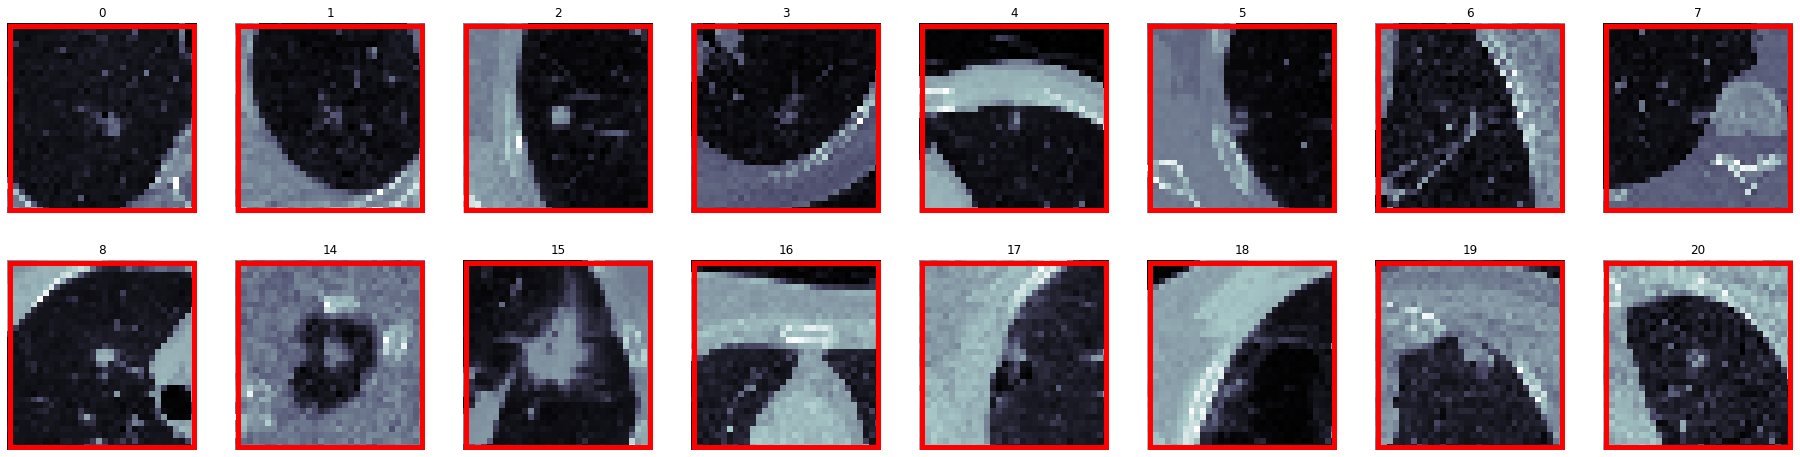

<Figure size 432x288 with 0 Axes>

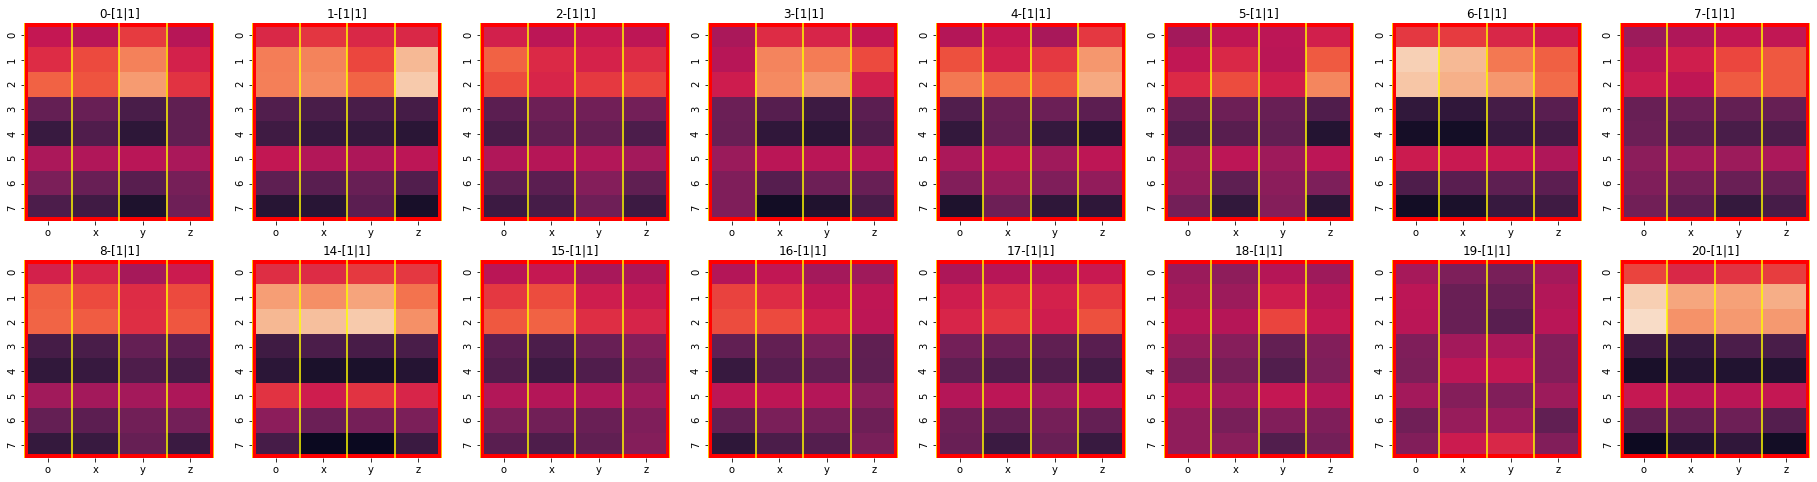

<Figure size 432x288 with 0 Axes>

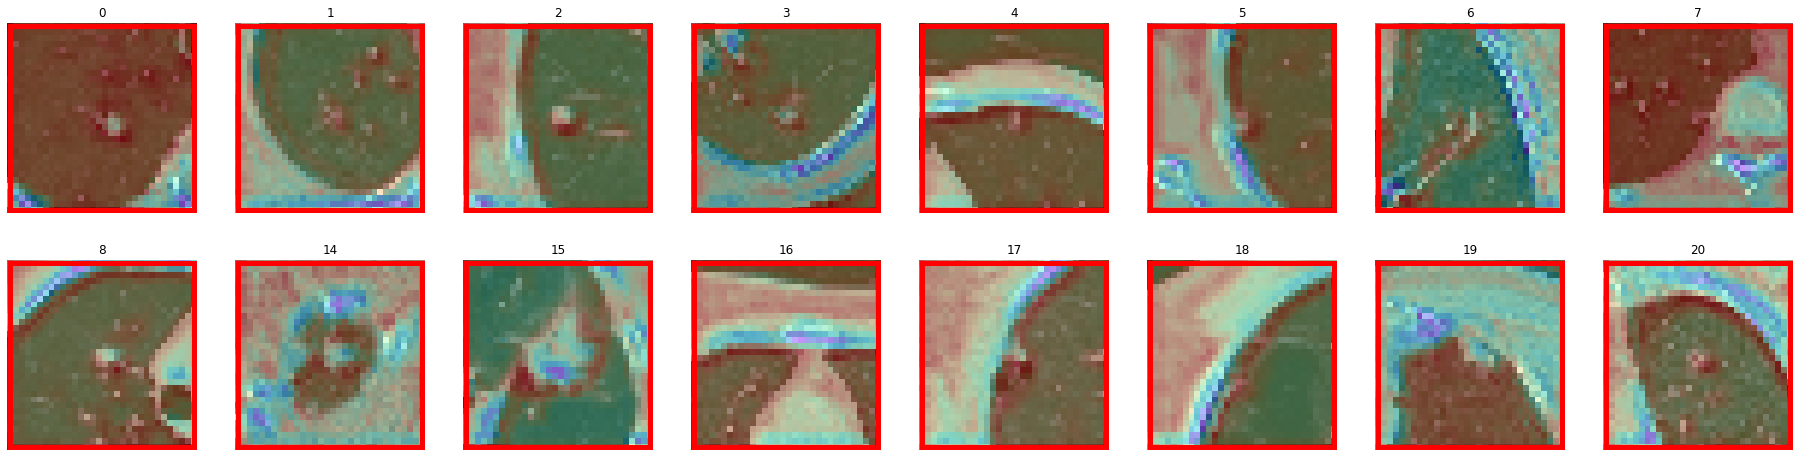

In [34]:
def plot_nodule_img(ax, idx,  nods_lst, gts, img_dir = '/mnt/nlst/nparray2/'):
    nod_npy   = np.load(osp.join(img_dir, nods_lst[idx]))
    nod_npy = ndimage.interpolation.zoom(nod_npy, [0.5,  0.25, 0.25])
    nod_npy = (nod_npy - 446.66314534876193)/576.2785657459063

    ax.add_patch(patches.Rectangle((0,0),31, 31,linewidth=5, edgecolor="red", facecolor='none'))
    ax.imshow(nod_npy[15,:,:], cmap = "bone")
    ax.axis("off")
    ax.set_title(str(idx))

def plot_feature_vector(ax, idx, feats,preds, gts):
    sns.heatmap(feats[:,idx,:].T, ax = ax,
                    vmin =0, vmax=2.5, cbar=False)
    ax.add_patch(patches.Rectangle((0,0),4, 8,linewidth=8, edgecolor="red", facecolor='none'))
    ax.set_title("%d-[%d|%d]" %(idx, preds[idx], gts[idx]))
    ax.set_xticklabels(["o", "x", "y","z"])
    ax.vlines(np.arange(5), *ax.get_ylim(), color="yellow")
    
def plot_imgs_grid(viz_func, viz_lst, *kwarg, nrows=2, ncols=8):
    plt.figure()
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols *4,nrows *4))
    for i in range(nrows):
        for j in range(ncols):
            idx = (i * ncols +j)
            if idx >= len(viz_lst):
                return
            viz_func(axs[i,j],  viz_lst[idx], *kwarg)

def get_view(nod_npy, view = 0):
    if view == 0:
        return nod_npy
    elif view == 1:
        return np.swapaxes(nod_npy,0,1)
    elif view == 2:
        return np.swapaxes(nod_npy,0,2)
    elif view == 3:
        return np.swapaxes(nod_npy,1,2)
    
def plot_nodule_sp_attention(ax, idx,  nods_lst, gts, sp_attn, view, img_dir ='/mnt/nlst/nparray2/'):
    nod_npy   = np.load(osp.join(img_dir, nods_lst[idx]))
    nod_npy = ndimage.interpolation.zoom(nod_npy, [0.5,  0.25, 0.25])
    nod_npy = (nod_npy - 446.66314534876193)/576.2785657459063

    ax.add_patch(patches.Rectangle((0,0),31,31,linewidth=5, edgecolor="red" if gts[idx] == 1 else "green", facecolor='none'))
    nod_npy_vis = get_view(nod_npy, view)
    ax.imshow(nod_npy_vis[15,:,:], cmap = "bone")
    ax.imshow(sp_attn[view, idx,:][15,:,:], alpha=0.4, cmap='rainbow')
    ax.axis("off")
    ax.set_title(str(idx))

viz_lst = np.arange(16)
#Plot nodule images
plot_imgs_grid(plot_nodule_img, correct_preds[:16] , nod_ids, gts, nrows=2, ncols=8)
#Plot features vectors
plot_imgs_grid(plot_feature_vector, correct_preds[:16], feats, preds, gts, nrows=2, ncols=8)
#Plot heat map
plot_imgs_grid(plot_nodule_sp_attention, correct_preds[:16], nod_ids, gts, sp_attn_maps, 0, nrows=2, ncols=8)
# array([  9,  10,  11,  12,  13,  21,  22,  24,  28,  43,  44,  46,  49,
#         51,  53,  62,  83,  84,  88,  93,  96, 104, 105, 106, 107, 108,
#        111, 112, 113, 119, 127, 130, 140, 143, 149, 155, 158, 161, 165,
#        166, 173, 176, 179, 196, 215, 233, 238, 241, 243, 252, 255, 258,
#        259, 261, 277, 278, 292, 294, 297, 299, 302, 309])


<Figure size 432x288 with 0 Axes>

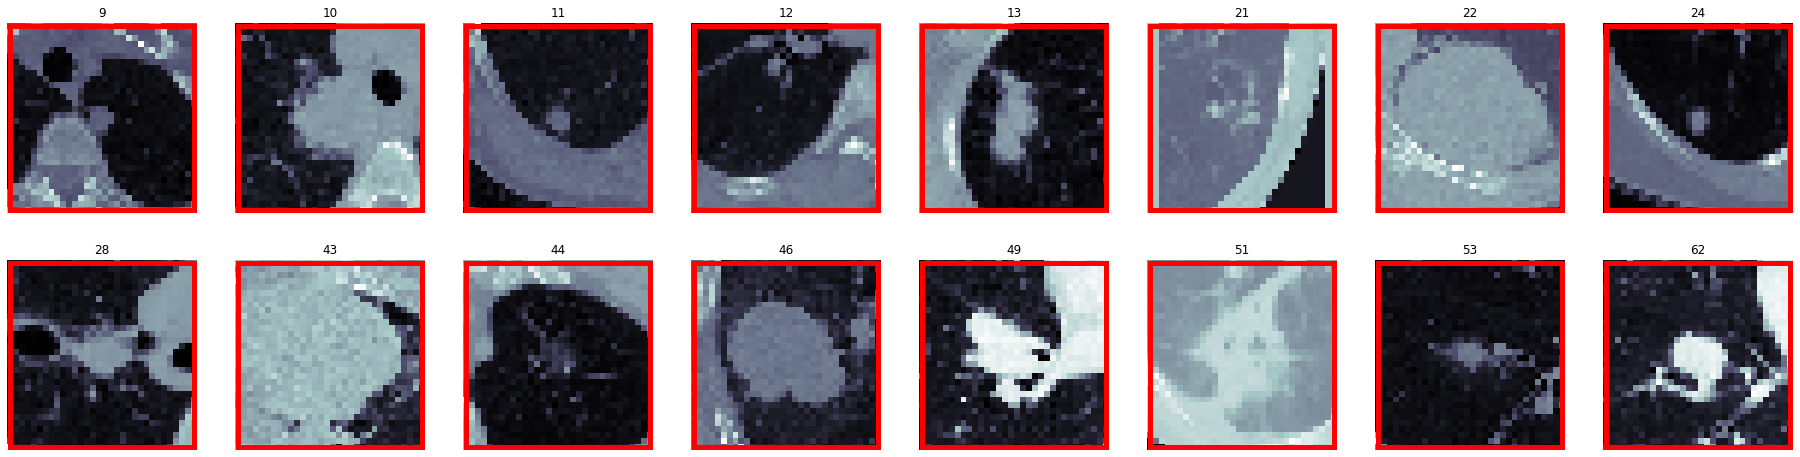

<Figure size 432x288 with 0 Axes>

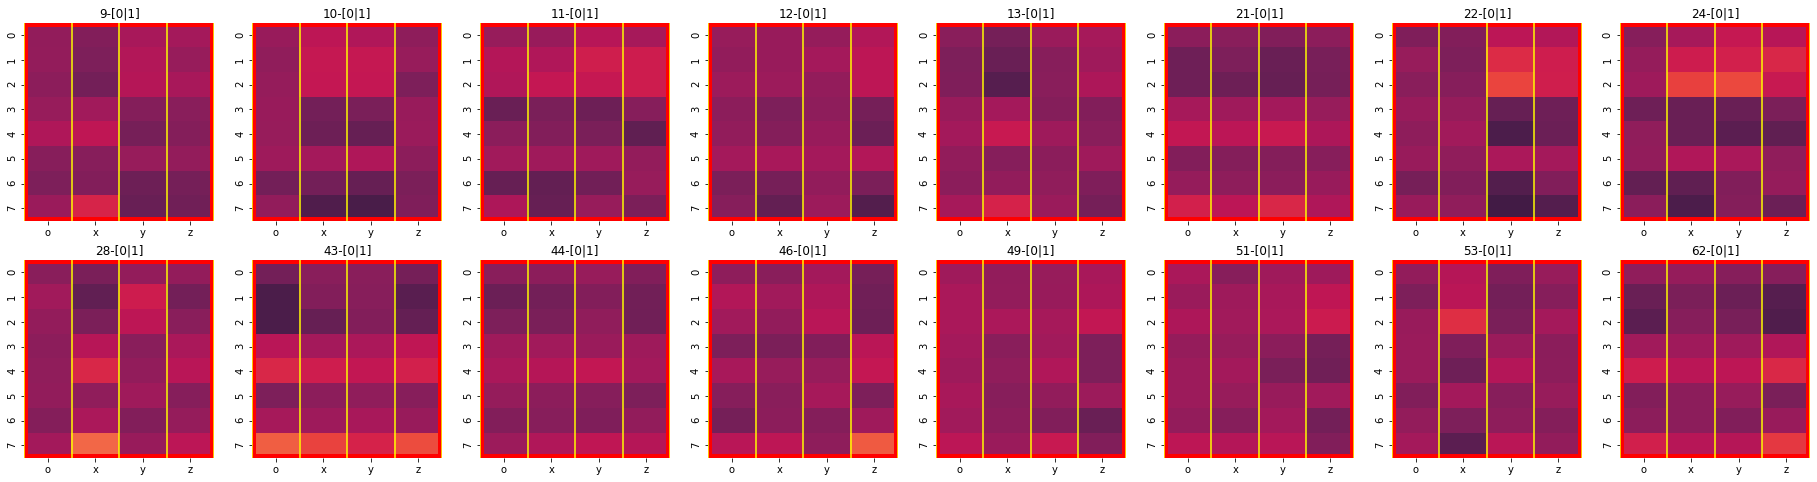

<Figure size 432x288 with 0 Axes>

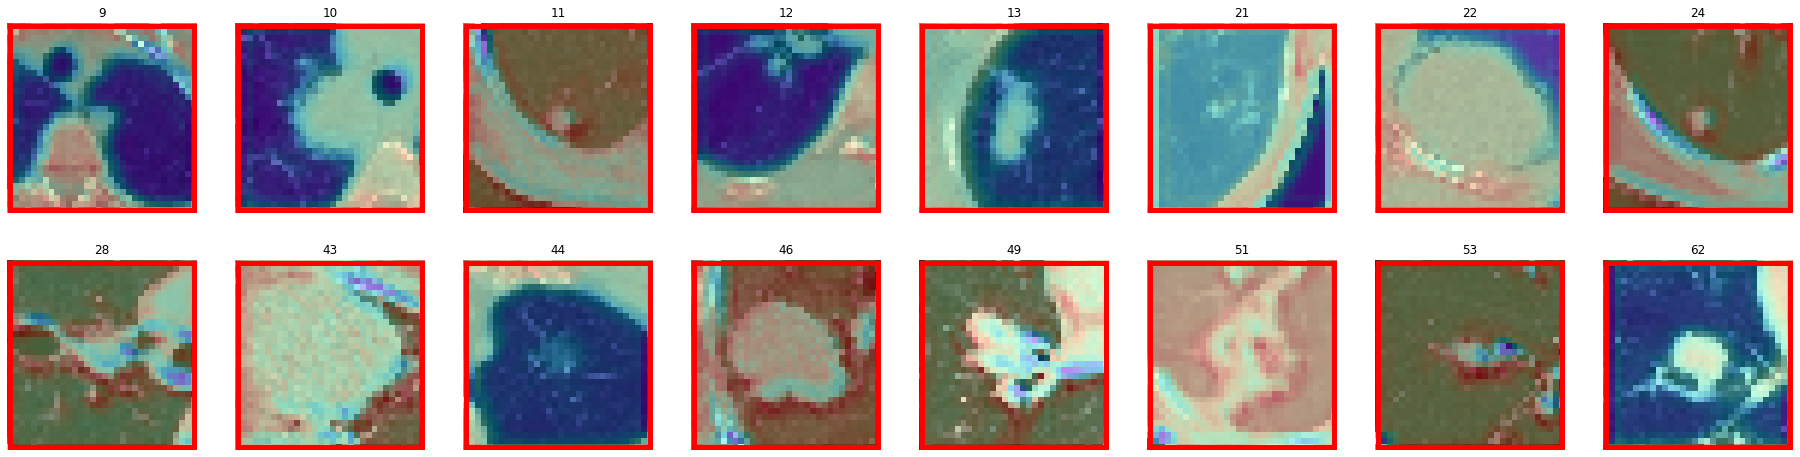

In [32]:
plot_imgs_grid(plot_nodule_img, incorrect_preds[:16], nod_ids, gts, nrows=2, ncols=8)
#Plot features vectors
plot_imgs_grid(plot_feature_vector, incorrect_preds[:16], feats, preds, gts, nrows=2, ncols=8)
#Plot heat map
plot_imgs_grid(plot_nodule_sp_attention, incorrect_preds[:16], nod_ids, gts, sp_attn_maps, 0, nrows=2, ncols=8)
